# Michelle Kouba
# Collaborative Movie Recommender System

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Turning off warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [ ]:
# Opening datafiles and inspecting them
# Ratings database
ratings = pd.read_csv('ratings.csv')

In [ ]:
#Movies Database
movies = pd.read_csv('movies.csv')
# Removing year from movie
movies['title'] = movies['title'].str.strip().str[:-7]
# Cleaning up genre
movies['genres'] = movies['genres'].str.replace('|', ' ')

In [ ]:
# Joining the data together into one file for analysis
df = ratings.merge(movies, on='movieId', how = 'left')
# Dropping extraneous variables
df = df.drop(columns=['timestamp'])
# Removing duplicate movie mentions
df.drop_duplicates(subset=['title'])

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story,Adventure Animation Children Comedy Fantasy
1,1,3,4.0,Grumpier Old Men,Comedy Romance
2,1,6,4.0,Heat,Action Crime Thriller
3,1,47,5.0,Seven (a.k.a. Se7en),Mystery Thriller
4,1,50,5.0,"Usual Suspects, The",Crime Mystery Thriller
...,...,...,...,...,...
100820,610,160341,2.5,Bloodmoon,Action Thriller
100821,610,160527,4.5,Sympathy for the Underdog,Action Crime Drama
100823,610,160836,3.0,Hazard,Action Drama Thriller
100827,610,163937,3.5,Blair Witch,Horror Thriller


## Vectorizing the genre types for easier analysis

All frequencies:
             Frequency
Word                  
drama            41928
comedy           39053
action           30635
thriller         26452
adventure        24161
romance          18124
sci-fi           17243
crime            16681
fantasy          11834
children          9208
mystery           7674
horror            7291
animation         6988
war               4859
imax              4145
musical           4138
western           1930
documentary       1219
film-noir          870
genres              47
listed              47


<AxesSubplot:xlabel='Word'>

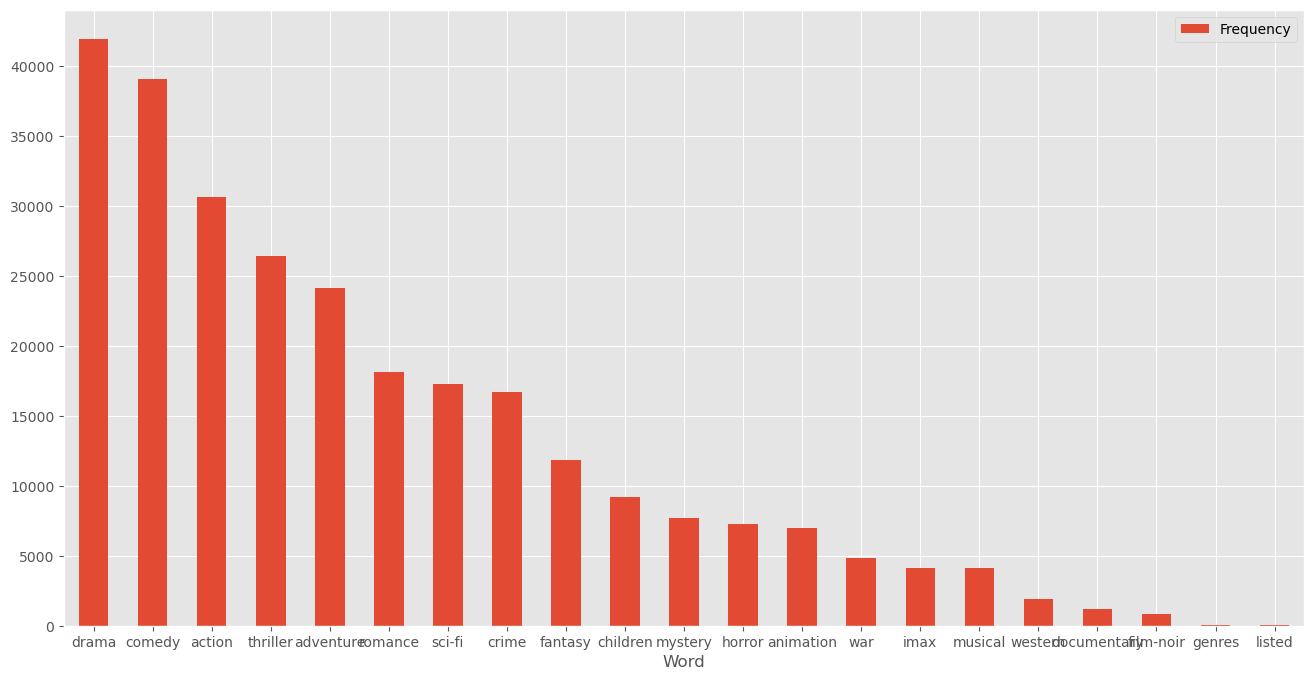

In [ ]:
# Analyzing the genre data for types of genre and frequency of each genre
# Guessing 30 total genre to start
top_N = 30
txt = df.genres.str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + [')', '(', ',', ':', "'s", '.', '!', '&', '?']
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)

print('All frequencies:')
print('=' * 60)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word').head(25)
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')
rslt.plot.bar(rot=0, figsize=(16, 8), fontsize=10)

The next step would be to create a variable that holds a vector of 21 possible genre types.   This is important given that each movie could belong to numerous different genres so it's similar to creating 21 dummy variables but all in the same location.  Then we can search for romantic comedies even if other genres are listed as well for some of the movies.

In [ ]:
# Initializing the vectorizer to create the genre vector
vectorizer = CountVectorizer()
# Fitting and transforming the genre names into values
x = vectorizer.fit_transform(df['genres'].values)
# Collecting 21 genres into a list entitled feature_names
feature_names = vectorizer.get_feature_names()
# Creating a dataframe for the genre (21 possible genres all yes/no or 0/1)
genres_bow = pd.DataFrame(x.toarray(), columns=feature_names)
# And then combining them into one list for each movie.
genres_bow['combined']= genres_bow.values.tolist()
genres_bow['combined']
# Replacing the worded genre in the main file with the vectorized genre list
df['genres'] = genres_bow['combined']
df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,1,3,4.0,Grumpier Old Men,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1,6,4.0,Heat,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,47,5.0,Seven (a.k.a. Se7en),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1,50,5.0,"Usual Suspects, The","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Building the Recommendation System (Hybrid) Based on Collaborative Filtering (Ratings) and Content-Based Filtering (Genres)

In [ ]:
# Using cosine similarity to find the similarities between the genre vectors for each movie
# (the more similarities between the genres listed, the closer to 1 the value will be)
# Creating a vector of movies and their cosine similarity to ever other movie based on genre


Due to memory issues with the cosine similarity matrix, I'm either going to need to buy a bigger computer or just use a simplier model.  (Edit: I now have access to Google Colab and have begun work on this....)

### Feature engineering

In [ ]:
# Calculating the average rating across users for each movie
Average_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
# Summing the total ratings per movie
Average_ratings['Total Ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

### Building a Collaborative Recommender System

In [ ]:
# Creating a user by movie recommendations matrix (user=row, movies=column)
movie_user = df.pivot_table(index='userId',columns='title',values='rating')

In [ ]:
#Function that receives the movie for recommendations and outputs the top 10 movie recommendations
def GetRecommendations (movie):
    # Creating a correlation value with all the other movies based on input movie
    correlations = movie_user.corrwith(movie_user[movie])
    # Moving the matrix into a pandas dataframe
    recommendation = pd.DataFrame(correlations,columns=['Correlation'])
    # Removing all the empty values in the matrix
    recommendation.dropna(inplace=True)
    # Adding the total ratings column with the correlations
    recommendation = recommendation.join(Average_ratings['Total Ratings'])
    # Sorting the correlation values from highest to lowest and removing those with less than 100 ratings
    recc = recommendation[recommendation['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()
    # Joining with the movie database to get movie titles added in
    recc = recc.merge(movies,on='title', how='left')
    # Printing
    print('------------------------------------')
    print('Top 10 Movie Recommendations for You')
    print('------------------------------------')
    # Skipping top correlation which is the movie itself and printing  the next ten.
    for i in range (1,11):
        print (recc.iloc[i]['title'])

In [ ]:
# Asking for the movie to create the top 10 recommendations from
movie = input('Please type in the movie you would like to receive a recommendation for  :')
GetRecommendations(movie)

Please type in the movie you would like to receive a recommendation for  :Anne of Green Gables
------------------------------------
Top 10 Movie Recommendations for You
------------------------------------
Goodfellas
Jurassic Park
Batman Begins
Eternal Sunshine of the Spotless Mind
Lord of the Rings: The Fellowship of the Ring, The
Mask, The
Ocean's Eleven
Minority Report
Godfather, The
Gladiator


First, I cleaned up the data and merged the datasets together to combine ratings and movies.  I removed the year from the movie title as someone inputting a movie name would be unlikely to get the title right.  I then cleaned up the genres and created a vector of all the different genre types and then 0/1 for whether that genre was applicable to said movie.  I tried to create a cosine similarity matrix to attempt to create a hybrid model but didn't have enough memory space.  I switched to a collaborative approach because it was simpler.  I then calculated the average ratings for each movie and the number of ratings each movie received as I was only interested in highly rated movies and movies with good number of ratings for a more robust model (which in the end had some drawbacks based on the higher ratings and numerous ratings).  I created a correlation matrix to find movies that were highly correlated (positively) to each movie so that when a movie is inputted, the top 10 highest correlated movies were then suggested (each top 10 movie must have had at least 100 ratings to qualify).

I originally went with a hybrid model which is likely the best scenario here (mix between collaborative and content-based), but did not have the memory space to run the cosine similarity matrix needed for the content-based system (I was just using the genres as content, not the tags which would have been even more complex and required more memory).  I couldn't find a work around without vastly cutting down the number of movies to analyze or buying another computer, so I went with the collaborative recommendation system.  A collaborative filtering system uses users past experiences with the movies (so their ratings of each movie) to produce new recommendations.  There are different types of collaborative filtering systems and I used the item-item method where I compared the inputted movies' users who rated that movie the highest with other movies that were similarity rated the highest by the same users enjoying the inputted movies.

One major drawback to this approach, as I've highlighted above with the movie Anne of Green Gables (but I did see with many other movies I tried as well) is that certain HIGHLY rated movies enjoyed by many adults, some of which are movies of the year/decade, etc, aren't the same genre as the inputted movie.  While this isn't a very large issue in many cases, if you are inputting a children's movie such as this, then quite a few of the movies above are not recommended for children (especially due to the plethora of R-rated movies) so this type of model doesn't do a good job recommending to persons other than adults.   Similarly, if you tend not to really enjoy the mainstream movies of the year/decade, etc, then this model won't likely work well for you which is why a hybrid model is preferred as it takes into account the viewing habits of the majority of American adults and is often right, it also accounts for genre distinctions such as animated, children, etc... especially among movies in those genres in the chart above ordered by frequency of type.  Someone entering a musical, of which there are few, might not even get another musical recommendation due to the heavy weight of ratings reports (over 100).  

References: Date used was retrieved from grouplens.org/datasets/movielens/.  The specific dataset used was the MovieLens Latest Datasets (small), 9/2018.